# ASSIGNMENT 16: RECOMMENDATION SYSTEM

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder , MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation

# 1. Data preprocessing

In [5]:
df=pd.read_csv('anime.csv')

In [8]:
df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [10]:
df.shape

(12294, 7)

In [12]:
df.size

86058

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [16]:
df.describe()

,anime_id,rating,members
count,12294.000000,12064.000000,1.229400e+04
mean,14058.221653,6.473902,1.807134e+04
std,11455.294701,1.026746,5.482068e+04
min,1.000000,1.670000,5.000000e+00
25%,3484.250000,5.880000,2.250000e+02
50%,10260.500000,6.570000,1.550000e+03
75%,24794.500000,7.180000,9.437000e+03
max,34527.000000,10.000000,1.013917e+06


In [18]:
df.describe(include="all")

,anime_id,name,genre,type,episodes,rating,members
count,12294.000000,12294,12232,12269,12294,12064.000000,1.229400e+04
unique,NaN,12292,3264,6,187,NaN,NaN
top,NaN,Shi Wan Ge Leng Xiaohua,Hentai,TV,1,NaN,NaN
freq,NaN,2,823,3787,5677,NaN,NaN
mean,14058.221653,NaN,NaN,NaN,NaN,6.473902,1.807134e+04
std,11455.294701,NaN,NaN,NaN,NaN,1.026746,5.482068e+04
min,1.000000,NaN,NaN,NaN,NaN,1.670000,5.000000e+00
25%,3484.250000,NaN,NaN,NaN,NaN,5.880000,2.250000e+02
50%,10260.500000,NaN,NaN,NaN,NaN,6.570000,1.550000e+03
75%,24794.500000,NaN,NaN,NaN,NaN,7.180000,9.437000e+03


In [20]:
df.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

<Axes: >

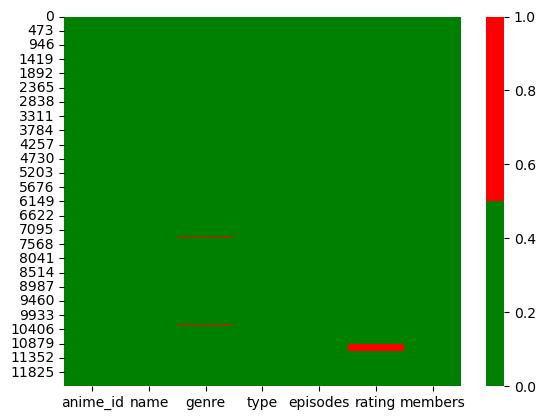

In [22]:
cols = df.columns 
colors = ['green', 'red'] # red is missing. green is not missing.
sns.heatmap(df[cols].isnull(),
            cmap=sns.color_palette(colors), cbar = True)

In [24]:
df["genre"].value_counts()

genre
Hentai                                                  823
Comedy                                                  523
Music                                                   301
Kids                                                    199
Comedy, Slice of Life                                   179
                                                       ... 
Adventure, Drama, Fantasy, Game, Sci-Fi                   1
Adventure, Demons, Fantasy, Historical                    1
Action, Comedy, Drama, Mecha, Music, Sci-Fi, Shounen      1
Action, Comedy, Fantasy, Mecha, Sci-Fi, Shounen           1
Hentai, Slice of Life                                     1
Name: count, Length: 3264, dtype: int64

In [26]:
df["genre"].mode()[0]

'Hentai'

In [28]:
df["genre"] = df["genre"].fillna(df["genre"].mode()[0])

In [30]:
# Treat missing values in categorical column
df["type"].value_counts()
df["type"].mode()[0]
df["type"] = df["type"].fillna(df["type"].mode()[0])

In [32]:
#Imputation of missing value with median, column= rating
median = df['rating'].median()
print(median)

6.57


In [34]:
df.isnull().sum()

anime_id      0
name          0
genre         0
type          0
episodes      0
rating      230
members       0
dtype: int64

# 2. Feature Extraction:

In [37]:
features = ['genre' , 'type' , 'episodes' , 'rating' , 'members']

In [39]:
one_hot_genre = df['genre'].str.get_dummies(sep=' , ')
one_hot_type = pd.get_dummies(df['type'] , prefix='type')

In [40]:
#Combine one-hot encoded features with the original dataset
df = pd.concat([df ,one_hot_genre ,one_hot_type] , axis=1)

In [41]:
df

,anime_id,name,genre,type,episodes,rating,members,Action,"Action, Adventure","Action, Adventure, Cars, Comedy, Sci-Fi, Shounen",...,Supernatural,Thriller,Vampire,Yaoi,type_Movie,type_Music,type_ONA,type_OVA,type_Special,type_TV
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,0,0,0,...,0,0,0,0,True,False,False,False,False,False
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,0,0,0,...,0,0,0,0,False,False,False,False,False,True
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,0,0,0,...,0,0,0,0,False,False,False,False,False,True
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,0,0,0,...,0,0,0,0,False,False,False,False,False,True
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266,0,0,0,...,0,0,0,0,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211,0,0,0,...,0,0,0,0,False,False,False,True,False,False
12290,5543,Under World,Hentai,OVA,1,4.28,183,0,0,0,...,0,0,0,0,False,False,False,True,False,False
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219,0,0,0,...,0,0,0,0,False,False,False,True,False,False
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175,0,0,0,...,0,0,0,0,False,False,False,True,False,False


In [45]:
#drop the original categorical column
df.drop(['genre' , 'type'] , axis =1 , inplace = True)

In [47]:
df['name'].value_counts()

name
Shi Wan Ge Leng Xiaohua                           2
Saru Kani Gassen                                  2
Bakabon Osomatsu no Karee wo Tazunete Sansenri    1
Backkom Meogeujan Yeohaeng                        1
Backkom Mission Impossible                        1
                                                 ..
Yoroiden Samurai Troopers Kikoutei Densetsu       1
Yuu☆Yuu☆Hakusho: Mu Mu Hakusho                    1
3-gatsu no Lion meets Bump of Chicken             1
Bannou Bunka Neko-Musume                          1
Yasuji no Pornorama: Yacchimae!!                  1
Name: count, Length: 12292, dtype: int64

In [49]:
df.head()

,anime_id,name,episodes,rating,members,Action,"Action, Adventure","Action, Adventure, Cars, Comedy, Sci-Fi, Shounen","Action, Adventure, Cars, Mecha, Sci-Fi, Shounen, Sports","Action, Adventure, Cars, Sci-Fi",...,Supernatural,Thriller,Vampire,Yaoi,type_Movie,type_Music,type_ONA,type_OVA,type_Special,type_TV
0,32281,Kimi no Na wa.,1,9.37,200630,0,0,0,0,0,...,0,0,0,0,True,False,False,False,False,False
1,5114,Fullmetal Alchemist: Brotherhood,64,9.26,793665,0,0,0,0,0,...,0,0,0,0,False,False,False,False,False,True
2,28977,Gintama°,51,9.25,114262,0,0,0,0,0,...,0,0,0,0,False,False,False,False,False,True
3,9253,Steins;Gate,24,9.17,673572,0,0,0,0,0,...,0,0,0,0,False,False,False,False,False,True
4,9969,Gintama&#039;,51,9.16,151266,0,0,0,0,0,...,0,0,0,0,False,False,False,False,False,True


In [51]:
df1 = df.pivot(index='anime_id',columns='name',values='rating')

In [52]:
df1

name,&quot;0&quot;,"&quot;Aesop&quot; no Ohanashi yori: Ushi to Kaeru, Yokubatta Inu",&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,&quot;Bungaku Shoujo&quot; Memoire,&quot;Bungaku Shoujo&quot; Movie,&quot;Eiji&quot;,&quot;Eiyuu&quot; Kaitai,.hack//G.U. Returner,.hack//G.U. Trilogy,.hack//G.U. Trilogy: Parody Mode,...,s.CRY.ed,vivi,xxxHOLiC,xxxHOLiC Kei,xxxHOLiC Movie: Manatsu no Yoru no Yume,xxxHOLiC Rou,xxxHOLiC Shunmuki,Üks Uks,ēlDLIVE,◯
anime_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34519,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34522,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
df1.fillna(0, inplace=True)

In [56]:
df1

name,&quot;0&quot;,"&quot;Aesop&quot; no Ohanashi yori: Ushi to Kaeru, Yokubatta Inu",&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,&quot;Bungaku Shoujo&quot; Memoire,&quot;Bungaku Shoujo&quot; Movie,&quot;Eiji&quot;,&quot;Eiyuu&quot; Kaitai,.hack//G.U. Returner,.hack//G.U. Trilogy,.hack//G.U. Trilogy: Parody Mode,...,s.CRY.ed,vivi,xxxHOLiC,xxxHOLiC Kei,xxxHOLiC Movie: Manatsu no Yoru no Yume,xxxHOLiC Rou,xxxHOLiC Shunmuki,Üks Uks,ēlDLIVE,◯
anime_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34514,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34519,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34522,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [269]:
user_sim = 1-pairwise_distances(df1.values,metric='cosine')

In [270]:
user_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [273]:
user_sim.shape

(12294, 12294)

In [275]:
user_sim.size

151142436

In [277]:
user_sim.ndim

2

In [279]:
np.fill_diagonal(user_sim, 0)
user_sim[0:15, 0:15]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.

In [281]:
user_sim_df = pd.DataFrame(user_sim)
user_sim_df.iloc[0:20,0:20]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [283]:
user_sim_df.idxmax(axis=1)[0:50]

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
48    0
49    0
dtype: int64

In [285]:
df[(df['anime_id']==6) | (df['anime_id']==168)]

,anime_id,name,episodes,rating,members,Action,"Action, Adventure","Action, Adventure, Cars, Comedy, Sci-Fi, Shounen","Action, Adventure, Cars, Mecha, Sci-Fi, Shounen, Sports","Action, Adventure, Cars, Sci-Fi",...,Supernatural,Thriller,Vampire,Yaoi,type_Movie,type_Music,type_ONA,type_OVA,type_Special,type_TV
214,6,Trigun,26,8.32,283069,0,0,0,0,0,...,0,0,0,0,False,False,False,False,False,True
1761,168,s.CRY.ed,26,7.45,52784,0,0,0,0,0,...,0,0,0,0,False,False,False,False,False,True


In [287]:
user1= df[df['anime_id']==6]
user1

,anime_id,name,episodes,rating,members,Action,"Action, Adventure","Action, Adventure, Cars, Comedy, Sci-Fi, Shounen","Action, Adventure, Cars, Mecha, Sci-Fi, Shounen, Sports","Action, Adventure, Cars, Sci-Fi",...,Supernatural,Thriller,Vampire,Yaoi,type_Movie,type_Music,type_ONA,type_OVA,type_Special,type_TV
214,6,Trigun,26,8.32,283069,0,0,0,0,0,...,0,0,0,0,False,False,False,False,False,True


In [289]:
user2= df[df['anime_id']==168]
user2

,anime_id,name,episodes,rating,members,Action,"Action, Adventure","Action, Adventure, Cars, Comedy, Sci-Fi, Shounen","Action, Adventure, Cars, Mecha, Sci-Fi, Shounen, Sports","Action, Adventure, Cars, Sci-Fi",...,Supernatural,Thriller,Vampire,Yaoi,type_Movie,type_Music,type_ONA,type_OVA,type_Special,type_TV
1761,168,s.CRY.ed,26,7.45,52784,0,0,0,0,0,...,0,0,0,0,False,False,False,False,False,True


In [295]:
print(user1.name)
print(user2.name)

214    Trigun
Name: name, dtype: object
1761    s.CRY.ed
Name: name, dtype: object


In [303]:
anime_watched_by_user1 = list(set(user1.name))
anime_watched_by_user2 = list(set(user2.name))
print(anime_watched_by_user1)
print(anime_watched_by_user2)

['Trigun']
['s.CRY.ed']


In [305]:
for anime_name in anime_watched_by_user1:
  if anime_name not in anime_watched_by_user2:
    print("Recommendation : ", anime_name)

Recommendation :  Trigun


In [307]:
for x in user_sim_df.index:
    sim_user = user_sim_df.idxmax(axis=1)[x]
    print (x,sim_user)
    user1=df[df['anime_id']== x]
    user2=df[df['anime_id']== sim_user]
    anime_watched_by_user1 = list(set(user1.name))
    anime_watched_by_user2 = list(set(user2.name))
                                  
    for anime_name in anime_watched_by_user1:
        if anime_name not in anime_watched_by_user2:
            print("Recommendation for userid:",sim_user , anime_name)
    for anime_name in anime_watched_by_user2:
        if anime_name not in anime_watched_by_user1:
            print("Recommendation for userid:", x, anime_name)

0 0
1 0
Recommendation for userid: 0 Cowboy Bebop
2 0
3 0
4 0
5 0
Recommendation for userid: 0 Cowboy Bebop: Tengoku no Tobira
6 0
Recommendation for userid: 0 Trigun
7 0
Recommendation for userid: 0 Witch Hunter Robin
8 0
Recommendation for userid: 0 Beet the Vandel Buster
9 0
10 0
11 0
12 0
13 0
14 0
15 0
Recommendation for userid: 0 Eyeshield 21
16 0
Recommendation for userid: 0 Hachimitsu to Clover
17 0
Recommendation for userid: 0 Hungry Heart: Wild Striker
18 0
Recommendation for userid: 0 Initial D Fourth Stage
19 0
Recommendation for userid: 0 Monster
20 0
Recommendation for userid: 0 Naruto
21 0
Recommendation for userid: 0 One Piece
22 0
Recommendation for userid: 0 Prince of Tennis
23 0
Recommendation for userid: 0 Ring ni Kakero 1
24 0
Recommendation for userid: 0 School Rumble
25 0
Recommendation for userid: 0 Sunabouzu
26 0
Recommendation for userid: 0 Texhnolyze
27 0
Recommendation for userid: 0 Trinity Blood
28 0
Recommendation for userid: 0 Yakitate!! Japan
29 0
Recomm

# Interview Questions:

## 1. Can you explain the difference between user-based and item-based collaborative filtering?

#### User-based filtering:
  
* Compares a user's past behavior to other users and recommends items based on the preferences of similar users. This type of filtering can be used to create personalized recommendations that fit a user's preferences

#### Item-based filtering:

* Finds similarities between items based on how users rate them, and then recommends similar items to users. For example, if users U1 and U2 have both liked grapes and watermelon, item-based filtering might recommend both fruits to each user.

## 2. What is collaborative filtering, and how does it work?

* Collaborative filtering is a recommender system that uses user interactions and data to suggest items to users based on how other users with similar preferences have interacted with those items. It's based on the idea that people who agree on their evaluation of certain items are likely to agree again in the future